# Read delta

In [1]:
from deltalake import DeltaTable
import pandas as pd
import pickle
import numpy as np

In [3]:
dt = DeltaTable('volume_data/outputs_3/metrics.delta')

In [4]:
df = dt.to_pandas()

In [5]:
df

,name,plddt,pae,ptm,rmsd,ipae,iptm
0,reordered_modified_gpc3_out_1_l108_s599292_mpn...,0.906233,0.195836,0.874024,2.057697,0.222387,0.899865


In [ ]:
# Path to your saved aux file
file_path = "volume_data/outputs_2/reordered_modified_gpc3_out_1_l108_s599292_mpnn3_model2_relaxed_aux.pkl"

with open(file_path, "rb") as f:
    results = pickle.load(f)

In [8]:
results.keys()

dict_keys(['aatype', 'atom_mask', 'atom_positions', 'cmap', 'grad', 'i_cmap', 'i_ptm', 'loss', 'losses', 'num_recycles', 'pae', 'plddt', 'prev', 'ptm', 'residue_index', 'seq', 'seq_pseudo', 'all', 'log'])

In [61]:
results["aatype"]

array([ 7, 15,  3, 10,  5, 19,  4, 10, 14, 11,  7, 14, 16,  4,  4, 15,  1,
       11, 12,  6,  6, 11, 18,  5, 10, 16,  0,  1, 10,  2, 12,  6,  5, 10,
       10,  5, 15,  0, 15, 11,  6, 10, 11, 13, 10,  9,  9,  5,  2,  0,  0,
       19, 13,  5,  6,  0, 13,  6,  9, 19, 19,  1,  8,  0, 11,  2, 18, 16,
        2,  0, 12, 13, 11,  2,  2, 18, 14, 15, 10, 16, 14,  5,  0, 13,  6,
       13, 19,  7,  6, 13, 13, 16,  3, 19, 15, 10, 18,  9, 10,  7, 15,  3,
        9,  2, 19,  3,  3, 12, 19,  2,  6, 10, 13,  3, 15, 10, 13, 14, 19,
        9, 18, 16,  5, 10, 12,  2, 14,  7, 10, 14,  3, 15,  0, 10,  3,  9,
        2,  6,  4, 10,  1,  7,  0,  1,  1,  3, 10, 11, 19, 13,  7,  2, 13,
       14, 11, 10,  9, 12, 16,  5, 19, 15, 11, 15, 10,  5, 19, 16,  1,  9,
       13, 10,  5,  0, 10,  2, 10,  7,  9,  6, 19,  9,  2, 16, 16,  3,  8,
       10, 11, 13, 15, 11,  3,  4,  7,  1, 12, 10, 16,  1, 12, 17, 18,  4,
       15, 18,  4,  5,  7, 10, 12, 12, 19, 11, 14,  4,  7,  7, 18,  4,  2,
       19, 19, 12,  5,  7

In [62]:
restypes = [
    'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P',
    'S', 'T', 'W', 'Y', 'V'
]

In [63]:
seq = [restypes[i] for i in results["aatype"]]

In [65]:
"".join(seq)

'GSDLQVCLPKGPTCCSRKMEEKYQLTARLNMEQLLQSASKELKFLIIQNAAVFQEAFEIVVRHAKNYTNAMFKNNYPSLTPQAFEFVGEFFTDVSLYILGSDINVDDMVNELFDSLFPVIYTQLMNPGLPDSALDINECLRGARRDLKVFGNFPKLIMTQVSKSLQVTRIFLQALNLGIEVINTTDHLKFSKDCGRMLTRMWYCSYCQGLMMVKPCGGYCNVVMQGCMAGVVEIDKYWREYILSLEELVNGMYRIYDMENVLLGLFSTIHDSIQYVQKNAGKLTTTIGKLCMELPTVEDLQKRRMEVYMKQRDAYRVARHPDVDREAARKLIDEMEELTFPFSRAITKLTFYLHLDPDLKNGAKEKIEEYQKEIDELEKKIEEIYEEIKKLPHYEEIVG'

<Axes: >

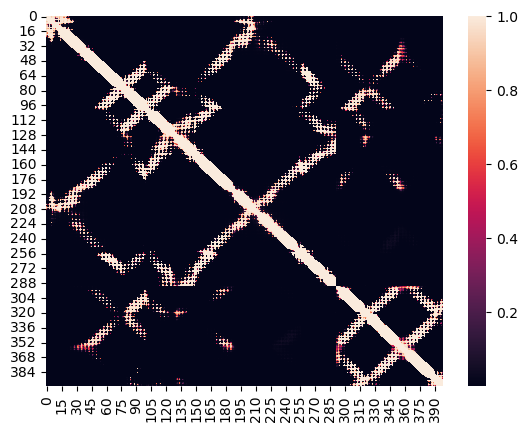

In [41]:
sns.heatmap(results["cmap"])

In [29]:
results["log"]["plddt"]

0.9062334299087524

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
pae = np.load("volume_data/outputs_3/reordered_modified_gpc3_out_1_l108_s599292_mpnn3_model2_relaxed_pae.npy")

<Axes: >

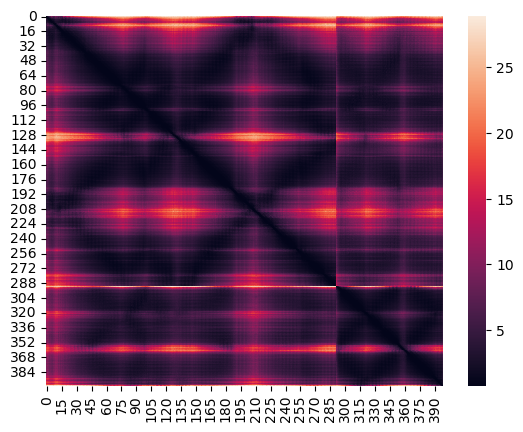

In [38]:
sns.heatmap(pae)

In [ ]:
pae[:291,291:].shape

(291, 399)

In [78]:
a = np.mean(np.min(pae[:291,291:],axis=1))
b = np.mean(np.min(pae[291:,:291],axis=1))
(a+b)/2

np.float32(3.8356075)

In [75]:
np.min(pae[:291,291:],axis=1).shape

(291,)

In [77]:
np.min(pae[291:,:291],axis=1).shape

(108,)

In [32]:
pae = pae / 31

In [33]:
pae = (pae + pae.T)/2

<Axes: >

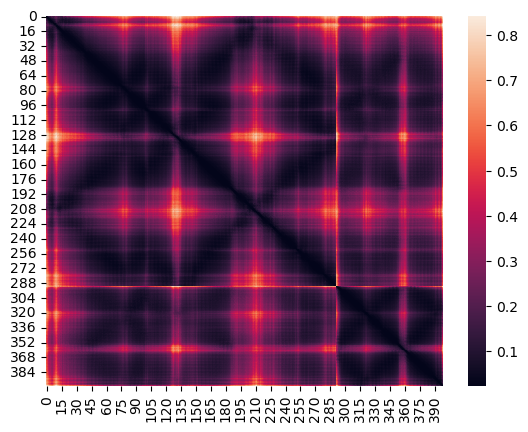

In [36]:
sns.heatmap(pae)

In [35]:
L = pae.shape[0]

In [ ]:

# 1. Check all available data categories
# 2. Access the summary metrics (pLDDT, PAE, pTM, etc.)
metrics = results["log"]
print(f"Mean pLDDT: {np.mean(metrics['plddt']):.2f}")
print(f"pTM score:  {metrics['ptm']:.2f}")

# 3. Access the full PAE matrix (Predicted Aligned Error)
# Use this for visualizing interface reliability
pae_matrix = results["pae"]
print(f"PAE matrix shape: {pae_matrix.shape}")